[[-0.689      -0.629     ]
 [ 0.12923     0.8423    ]
 [ 0.127234    0.81234   ]
 [ 0.85234    -0.798234  ]
 [ 0.91234    -0.97      ]
 [-0.688      -0.639     ]
 [ 0.41        0.49      ]
 [ 0.93       -0.83457   ]
 [-0.389       0.977     ]
 [ 0.41071898  0.48      ]
 [-0.73028746 -0.74933859]
 [-0.75137343 -0.73091723]
 [-0.72163264 -0.75235193]
 [ 0.47800762  0.4271211 ]
 [-0.2         0.87628712]]
<class 'numpy.ndarray'>


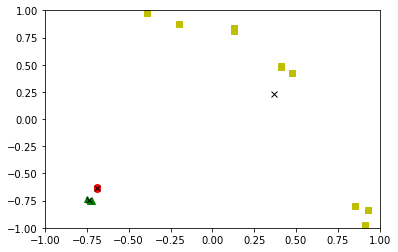

In [43]:
#Taken from https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/
# Just added plotting for 3-k cases

import numpy as np
import random
import matplotlib.pyplot as plt

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def change_coords(array):
    return list(map(list, zip(*array)))

def parse_output(data):
    clusters = data[1]
    points1 = change_coords(clusters[0])
    plt.plot(points1[0], points1[1], 'ro')
    points2 = change_coords(clusters[1])
    plt.plot(points2[0], points2[1], 'g^')
    points3 = change_coords(clusters[2])
    plt.plot(points3[0], points3[1], 'ys')
    centroids = change_coords(data[0])
    plt.plot(centroids[0], centroids[1], 'kx')
    plt.axis([-1.0, 1, -1.0, 1])
    plt.show()

#data = init_board(15)
data = np.array([[-0.689, -0.629],
 [ 0.12923,  0.8423],
 [ 0.127234,  0.81234],
 [ 0.85234,  -0.798234],
 [ 0.91234,  -0.97],
 [-0.688,  -0.639],
 [ 0.41,  0.49],
 [0.93,  -0.83457],
 [-0.389,  0.977],
 [ 0.41071898, 0.48],
 [-0.73028746, -0.74933859],
 [-0.75137343, -0.73091723],
 [-0.72163264,  -0.75235193],
 [0.47800762,  0.4271211 ],
 [-0.20,  0.87628712]])
print(data)
print(type(data))
out = find_centers(list(data), 3)
parse_output(out)

In [ ]:
print(data)
print(type(data))
out = find_centers(list(data), 3)
parse_output(out)